In [33]:
import os
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_absolute_error, mean_squared_error

# 0. Introdução

Os métodos de aprendizado de máquina que vamos empregar utilizam um subconjunto dos dados disponíveis para _treinar_ um algoritmo e outros subconjunto para _testar_ o resultado do treino e verificar a pe rformance do método em dados que não foram utilizados para o treinamento.

Esta linguagem é genérica e se aplica a todos os algoritmos, o que é prático para discutir os passos de uma dada análise. Por outro lado, ela obscurece o que está ocorrendo de fato no período de treinamento. Cada método possui seu próprio algoritmo, e estes possuem—na maior parte dos casos!—bases matemáticas robustas, calcadas na estatística e na teoria de otimização.

De forma muito resumida, **redes neurais** implementam numericamente um enorme "$f\odot g\odot h$" multidimensional, e o que chamamos de "treinamento" é o processo de tirar derivadas numéricas desta grande função multidimensional e não-linear buscando minimizar uma _função de perda_ (_loss function_), que no caso mais simples se trata de um $\chi^2$.

Já as **árvores de decisão** escolhem blablabalbalb.

**Florestas aleatórias** são um _ensemble method_ que treina múltiplas árvores de decisão, cada uma com blablablalal, e escolhe blablabla tal que blabalbala.

Neste notebook, vamos criar conjuntos de treino e teste (seção 1), aplicar cada um dos algoritmos acima aos nossos dados (seção 2) e avaliar sua performance (seção 3).

**FIXME:** Completar o texto desta célula.

# 1. Preparação de amostras de treino e teste

In [34]:
# Load the first CSV file (assumes it contains the test data)
data = pd.read_csv("./data/des_match_vvds_clean.csv")

# The 'z' columns is the target and the 'mag_*' and 'mag_err_' columns are the predictor
y = data['z']
X = data[['mag_auto_g_dered',
          'mag_auto_r_dered',
          'mag_auto_i_dered',
          'mag_auto_z_dered',
          'mag_auto_y_dered',
          'magerr_auto_g',
          'magerr_auto_r',
          'magerr_auto_i',
          'magerr_auto_z',
          'magerr_auto_y']]

In [35]:
# Split the data into training and test sets (e.g., 70/30 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 2. Treino/teste de três algoritmos de aprendizado de máquina e avaliação de sua performance

# 2.1 Treinando e testando os algoritmos

Nesta subseção, vamos treinar e testar uma _árvore de decisão_, uma _rede neural simples_ ("multi-layer perceptron") e uma _floresta aleatória_ nos dados que preparamos.  As três rodadas utilizarão a interface do scikit-learn para padronizar o código.

**FIXME:** Explicar a diferença entre regressão e classificação nos slides. (Ng).

### 2.1.1. Rede neural (Multi-layer perceptron)

In [36]:
from sklearn.neural_network import MLPRegressor

mlp = MLPRegressor(random_state=42)
mlp.fit(X_train, y_train)
y_pred_mlp = mlp.predict(X_test)

mlp_test_mae = mean_absolute_error(y_test, y_pred_mlp)
print("Multi-Layer Perceptron Validation MAE:", mlp_test_mae)

Multi-Layer Perceptron Validation MAE: 0.1521739975750021


### 2.1.2. Árvore de decisão (Decision tree)

In [37]:
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

dt_test_mae = mean_absolute_error(y_test, y_pred_dt)
print("Decision Tree Validation MAE:", dt_test_mae)

Decision Tree Validation MAE: 0.1393717011128776


### 2.1.3. Floresta aleatória (Random forest)

In [38]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

rf_test_mae = mean_absolute_error(y_test, y_pred_rf)
print("Random Forest Validation MAE:", rf_test_mae)

Random Forest Validation MAE: 0.1008815294117647


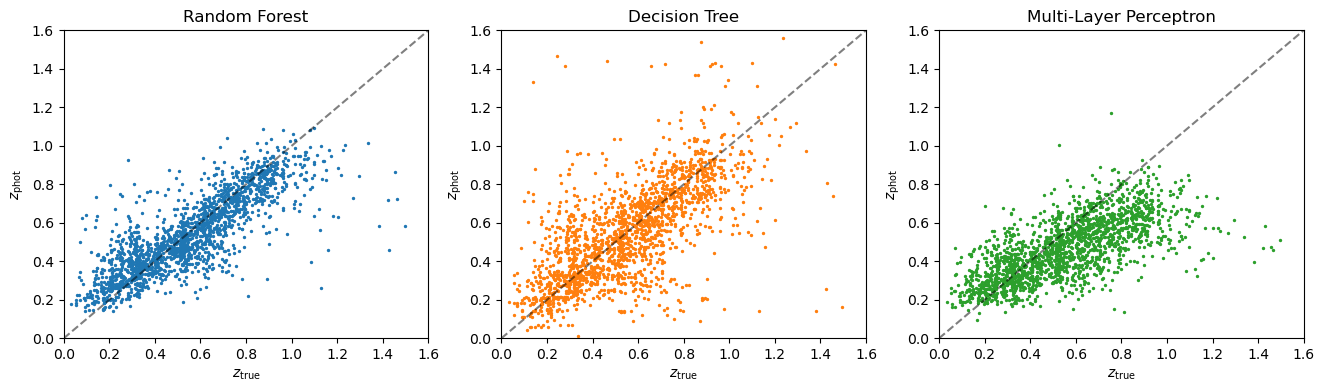

In [39]:
# Compare plots from three results

titles = ["Multi-Layer perceptron", "Decision tree", "Random forest"]
data_sets = [y_pred_mlp, y_pred_dt, y_pred_rf]
colors = ["C0", "C1", "C2"]

plt.figure(figsize=(16, 4))

plt.subplot(1, 3, 1)
plt.title("Random Forest")
plt.scatter(y_test, y_pred_rf, s=2, color="C0")
x = np.linspace(0, 1.6, 100)
plt.plot(x, x, "k--", alpha=0.5)
plt.ylim(0, 1.6)
plt.xlim(0, 1.6)
plt.xlabel(r"$z_\mathrm{true}$")
plt.ylabel(r"$z_\mathrm{phot}$")

plt.subplot(1, 3, 2)
plt.title("Decision Tree")
plt.scatter(y_test, y_pred_dt, s=2, color="C1")
x = np.linspace(0, 1.6, 100)
plt.plot(x, x, "k--", alpha=0.5)
plt.ylim(0, 1.6)
plt.xlim(0, 1.6)
plt.xlabel(r"$z_\mathrm{true}$")
plt.ylabel(r"$z_\mathrm{phot}$")

plt.subplot(1, 3, 3)
plt.title("Multi-Layer Perceptron")
plt.scatter(y_test, y_pred_mlp, s=2, color="C2")
x = np.linspace(0, 1.6, 100)
plt.plot(x, x, "k--", alpha=0.5)
plt.ylim(0, 1.6)
plt.xlim(0, 1.6)
_ = plt.xlabel(r"$z_\mathrm{true}$")
_ = plt.ylabel(r"$z_\mathrm{phot}$")

# 8. Quality assessment

In [40]:
def plot_metrics(zspec,
                 zphot,
                 maximum,
                 path_to_save='',
                 title=None,
                 initial=0):
    
    '''
    Function to plot Bias, Sigma_68, Out2σ, Out3σ given a spectroscopic and photometric redshift. 
    
    Args:
    
    zspec: Numpy array with the spectroscopic redshift.
    
    zphot: Numpy array with the photometric redshifts calculated. Same size as zspec.
    
    maximum: Float that indicates the redshift max of the plots.
    
    Kwargs:
    
    initial: Float that indicates the redshift min of the plots.
    
    
    
    '''
    bins = np.arange(0, 1.6, 0.1)
    points = bins + 0.05
    fraction_outliers = []
    sigma68z = []
    sigmaz = []
    meanz = []
    outliers_2 = []
    drop_bins = []

    for index in range(len(bins) - 1):
        bin_lower = bins[index]
        bin_upper = bins[index + 1]

        binmask = (zphot >= bin_lower) & (zphot <= bin_upper)

        if not np.any(binmask):
            drop_bins.append(index)
            continue
        
        values_r = zphot[binmask]
        values_s = zspec[binmask]

        deltabias = (values_r - values_s)
        mean_bias = np.mean(deltabias)  # Mean bias for each bin
        meanz.append(mean_bias)
        
        # FIXME: This part of the code is really bad. That's not how you calculate a quantile!
        s = np.sort(np.abs(deltabias/(1 + values_s))) # Standard deviation (sigma) for each bin
        sigma68 = s[int(len(s)*0.68)]
        sigma68z.append(sigma68)
        
        # FIXME: This part of the code is really bad. That's not how you calculate a standard deviation!
        sigma = (np.sum((values_r-values_s-mean_bias)**2)/len(values_r))**0.5
        sigmaz.append(sigma)
    
        # Calculate the fraction of outliers outside 3 sigma
        outliers = deltabias[np.abs(deltabias - mean_bias) > 3 * sigma]
        fraction_outlier = len(outliers) / len(deltabias)
        fraction_outliers.append(fraction_outlier)
    
        #2 sigma
        outliers2 = deltabias[np.abs(deltabias-mean_bias) > 2 * sigma]
        fraction_outlier2 = len(outliers2) / len(deltabias)
        outliers_2.append(fraction_outlier2)

    points = np.delete(points, drop_bins)


    fig, axes = plt.subplots(4, 1, figsize=(8, 8), sharex=True)
    plt.subplots_adjust(hspace=0.1) 

    axes[1]
    x_lim = (0, np.max(bins))

    # Subplot 1: Mean Bias
    axes[0].plot(points[:-1], meanz, 'bo-')
    axes[0].axhline(0, color='black', linestyle='--')
    axes[0].set_ylabel(r'$\Delta z$', fontsize=20)
    axes[0].set_xlim(x_lim)
    #axes[0].set_ylim(-0.05, 0.05)
    axes[0].tick_params(axis='both', labelsize=14)
    axes[0].grid(True)

    # Subplot 2: Sigma 68
    axes[1].plot(points[:-1], sigma68z, 'go-')
    axes[1].set_ylabel(r'$\sigma_{68}$', fontsize=20)
    axes[1].set_xlim(x_lim)
    axes[1].axhline(0.12, color='black', linestyle='--')
    #axes[1].set_ylim(0,max(sigmaz)+0.01)
    #axes[1].set_ylim(0, 0.03)
    axes[1].set_xlim(x_lim)
    axes[1].axhline(0.12, color='black', linestyle='--')
    #axes[1].set_ylim(0,max(sigmaz)+0.01)
    #axes[1].set_ylim(0, 0.03)
    axes[1].set_yticks(np.arange(0, 0.25, 0.05))
    axes[1].tick_params(axis='both', labelsize=14)
    axes[1].grid(True)


    # Subplot3: 2_outliers
    axes[2].plot(points[:-1],outliers_2,'o-',color='darkorange')
    #axes[2].set_xlabel(r'$Z_{phot}$', fontsize=20)
    axes[2].set_ylabel('out$_{2σ}$', fontsize=20)
    axes[2].set_xlim(x_lim)
    #axes[2].set_ylim(0,0.12)
    axes[2].axhline(0.1, color='black', linestyle='--')
    axes[2].tick_params(axis='both', labelsize=14)
    axes[2].grid(True)
    #axes[2].yaxis.set_major_formatter(FormatStrFormatter('%.2f'))

    # Subplot 4: 3_outliers
    axes[3].plot(points[:-1], fraction_outliers, 'ro-')
    axes[3].set_xlabel(r'$Z_{spec}$', fontsize=20)
    axes[3].set_ylabel('out$_{3σ}$', fontsize=20)
    axes[3].set_xlim(x_lim)
    #axes[3].set_ylim(0,0.12)
    axes[3].axhline(0.1, color='black', linestyle='--')
    axes[3].tick_params(axis='both', labelsize=14)
    axes[3].grid(True)
   

    plt.suptitle(title)
    plt.xlim(0, 1.6)
    plt.tight_layout()

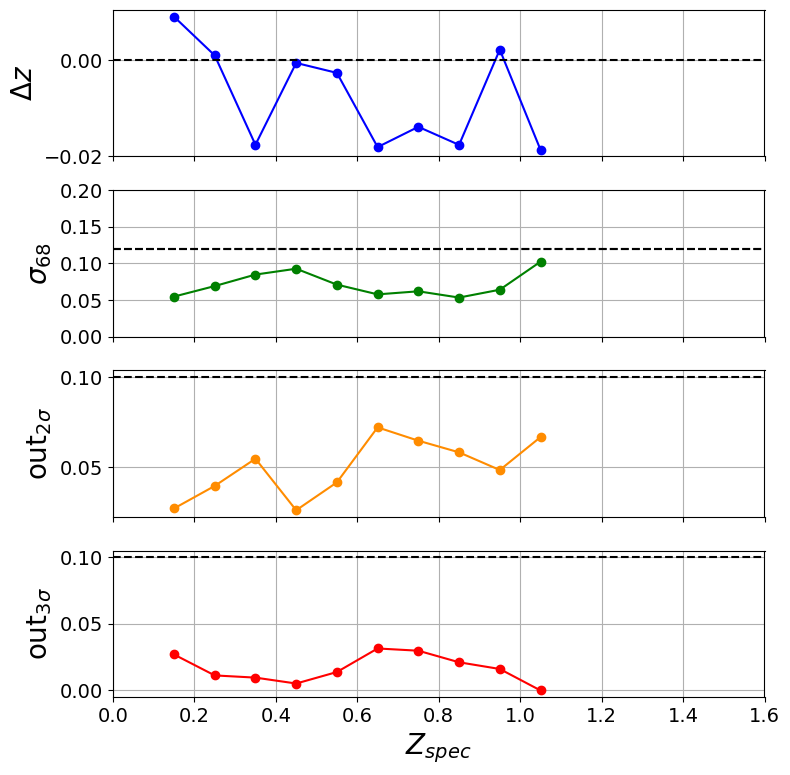

In [41]:
plot_metrics(y_test, y_pred_rf, 1.6, initial=0)

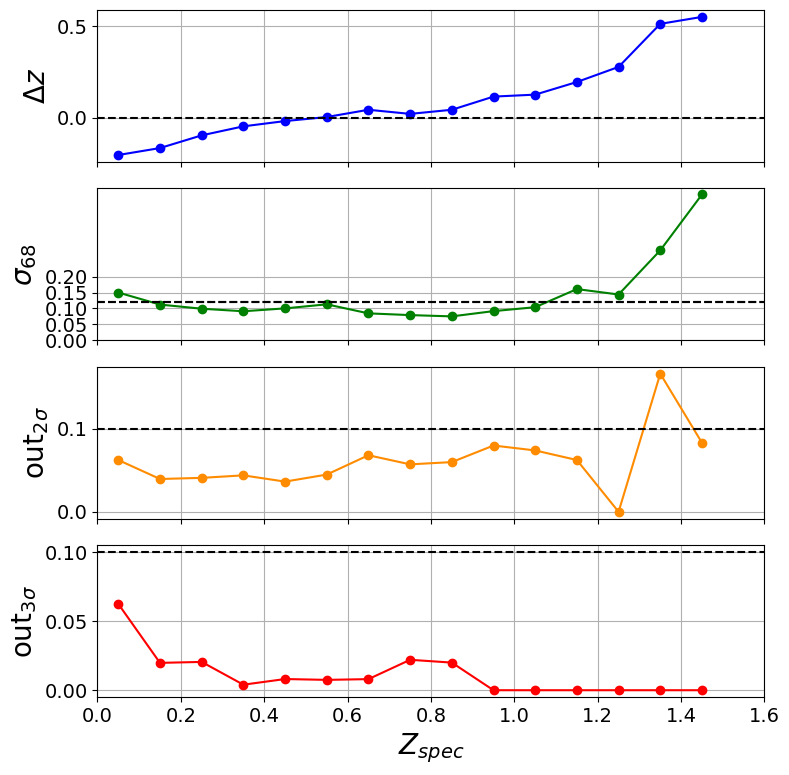

In [42]:
plot_metrics(y_test, y_pred_dt, 1.6, initial=0)

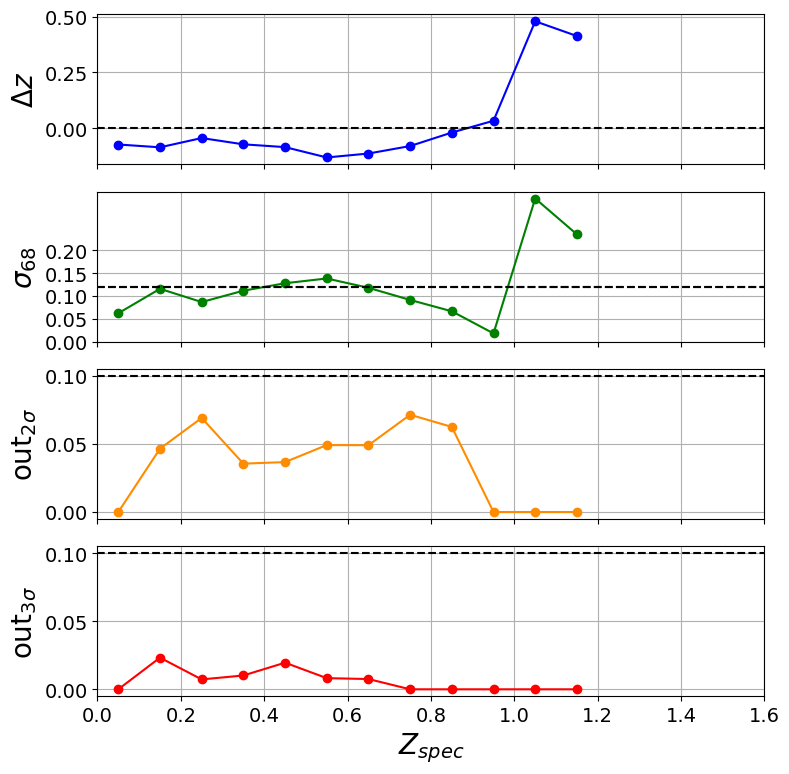

In [43]:
plot_metrics(y_test, y_pred_mlp, 1.6, initial=0)

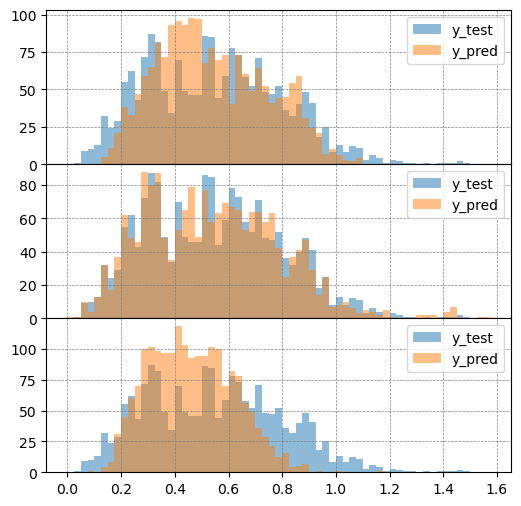

In [44]:
fig, axes = plt.subplots(3, 1, figsize=(6, 6), sharex=False)
plt.subplots_adjust(hspace=0.)

ax = axes[0]
#ax.set_xlabel('z', fontsize = 17)
ax.grid(color = 'gray', linestyle = '--', linewidth = 0.5) 
_ = ax.hist(y_test, bins=np.arange(0, 1.6, 0.025), density=False, color='C0', alpha=0.5)
_ = ax.hist(y_pred_rf, bins=np.arange(0, 1.6, 0.025), density=False, color='C1', alpha=0.5)
#ax.set_ylim(0, 160)
ax.legend(['y_test', 'y_pred'])

ax = axes[1]

#ax.set_xlabel('z', fontsize = 17)
ax.grid(color = 'gray', linestyle = '--', linewidth = 0.5) 
_ = ax.hist(y_test, bins=np.arange(0, 1.6, 0.025), density=False, color='C0', alpha=0.5)
_ = ax.hist(y_pred_dt, bins=np.arange(0, 1.6, 0.025), density=False, color='C1', alpha=0.5)
#ax.set_ylim(0, 160)
ax.legend(['y_test', 'y_pred'])
    
ax = axes[2]

#ax.set_xlabel('z', fontsize = 17)
ax.grid(color = 'gray', linestyle = '--', linewidth = 0.5) 
_ = ax.hist(y_test, bins=np.arange(0, 1.6, 0.025), density=False, color='C0', alpha=0.5)
_ = ax.hist(y_pred_mlp, bins=np.arange(0, 1.6, 0.025), density=False, color='C1', alpha=0.5)
#ax.set_ylim(0, 160)
ax.legend(['y_test', 'y_pred'])

# FIXME: 
- Include GAMA dataset too?
- Try to use ML techniques to understand what fields are the most important for the regression;
- Contrast pure decision trees vs random forests and discuss the concepts of overfitting and sensitivity to noise (follow lmu materila, scikit-learn material for experience and understanding)
- Test classification instead of regression;
- Test a neural network;
- Discuss limitations (run a nonrepresentative case?);
- Decide which fields I want to use, compare to other papers.

- For the moment, use Andreia's and Iago's codes for plots and quality evaluation to make things faster.
- Remember that it is more important to study the concepts and prepare the presentation instead of refining the code endlessly.

- For the moment, I am not even doing hyperparameter tuning, and I am not even doing train/test/validation either. So the next steps are to decide how much of this I will do, and I should try to do more of it today?

**FIXME:** Fazer slides desta célula

## Anúncios finais

1. Interesse no LIneA e no INCT: Heloísa + Luigi + Andreia.
2. Exemplos TCC Andreia, IC Iago, LSST work Amanda + Iago. Falar comigo ou com eles.
3. Similaridade com trabalho de indústria data science + machine learning.
4. Cosmologia observacional é uma área em plena explosão.

# 3. JAKEVDP SKLEARN 2.3.5 - Decision Tree Regression - With colors

In [45]:
# Load the first CSV file (assumes it contains the test data)
data = pd.read_csv("./data/des_match_vvds_clean.csv")

# The 'z' columns is the target and the 'mag_*' and 'mag_err_' columns are the predictor
N = len(data)
X_colors = np.zeros((N, 4))

X_colors[:, 0] = data['mag_auto_g_dered'] - data['mag_auto_r_dered']
X_colors[:, 1] = data['mag_auto_r_dered'] - data['mag_auto_i_dered']
X_colors[:, 2] = data['mag_auto_i_dered'] - data['mag_auto_z_dered']
X_colors[:, 3] = data['mag_auto_r_dered'] - data['mag_auto_z_dered']
z = data['z']


In [46]:
Ntrain = int(3 * N / 4)
Xtrain = X_colors[:Ntrain]
ztrain = z[:Ntrain]
Xtest = X_colors[Ntrain:]
ztest = z[Ntrain:]

In [47]:
dt_color = DecisionTreeRegressor(random_state=42)
dt_color.fit(Xtrain, ztrain)
zpred_color = dt_color.predict(Xtest)

In [48]:
dt_test_mae_color = mean_absolute_error(ztest, zpred_color)
print("Decision Tree Validation MAE:", dt_test_mae_color)

Decision Tree Validation MAE: 0.11998239033693578


Text(0, 0.5, '$z_\\mathrm{phot}$')

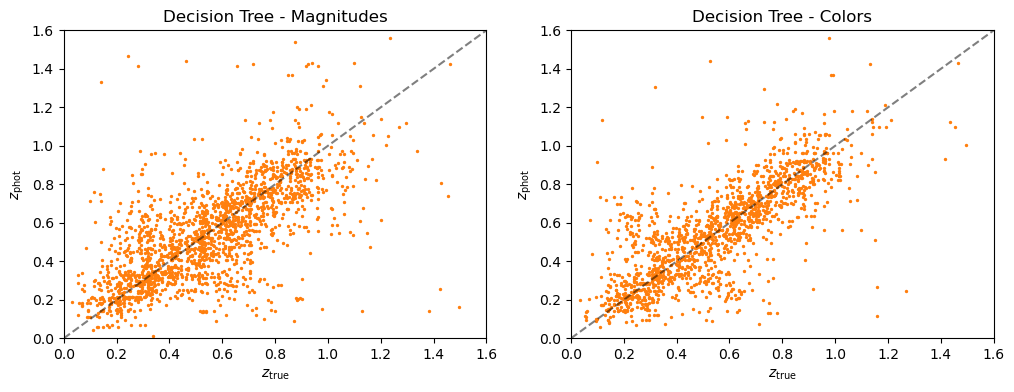

In [49]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.title("Decision Tree - Magnitudes")
plt.scatter(y_test, y_pred_dt, s=2, color="C1")
x = np.linspace(0, 1.6, 100)
plt.plot(x, x, "k--", alpha=0.5)
plt.ylim(0, 1.6)
plt.xlim(0, 1.6)
plt.xlabel(r"$z_\mathrm{true}$")
plt.ylabel(r"$z_\mathrm{phot}$")

plt.subplot(1, 2, 2)
plt.title("Decision Tree - Colors")
plt.scatter(ztest, zpred_color, s=2, color="C1")
x = np.linspace(0, 1.6, 100)
plt.plot(x, x, "k--", alpha=0.5)
plt.ylim(0, 1.6)
plt.xlim(0, 1.6)
plt.xlabel(r"$z_\mathrm{true}$")
plt.ylabel(r"$z_\mathrm{phot}$")

### MAYBE INSERT HERE "LEARNING CURVE TECHNIQUES DISCUSSED IN SECTION 3 OF THE TUTORIAL"

# 4. Exercise 2: Photometric Redshift Determination

## Divide into train/test/validation this time

In [89]:
Ntot = N
Ncv = Ntot // 5
Ntest = Ntot // 5
Ntrain = Ntot - Ncv - Ntest

X_train = X_colors[:Ntrain]
y_train = z[:Ntrain]

X_cv = X_colors[Ntrain:Ntrain + Ncv]
y_cv = z[Ntrain:Ntrain + Ncv]

X_test = X_colors[Ntrain + Ncv:]
y_test = z[Ntrain + Ncv:]

Text(0, 0.5, '$z_\\mathrm{phot}$')

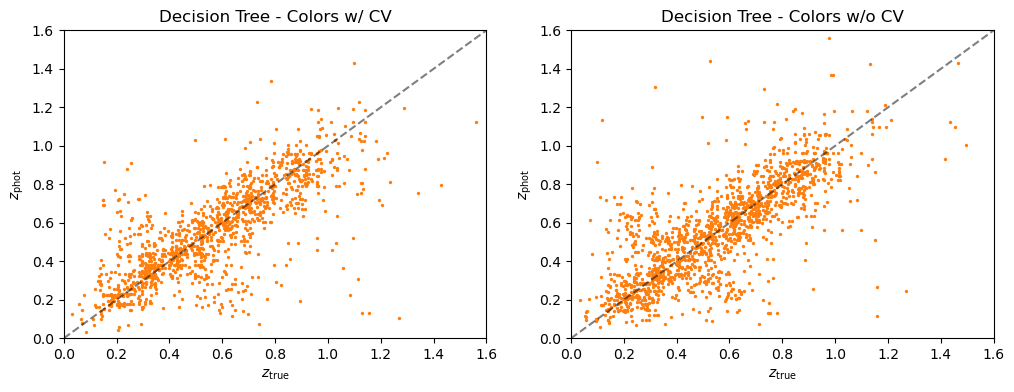

In [90]:
from sklearn.tree import DecisionTreeRegressor

clf = DecisionTreeRegressor(max_depth=15)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_cv)


plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.title("Decision Tree - Colors w/ CV")
plt.scatter(y_cv, y_pred, c='C1', s=2)
x = np.linspace(0, 1.6, 100)
plt.plot(x, x, "k--", alpha=0.5)
plt.ylim(0, 1.6)
plt.xlim(0, 1.6)
plt.xlabel(r"$z_\mathrm{true}$")
plt.ylabel(r"$z_\mathrm{phot}$")

plt.subplot(1, 2, 2)
plt.title("Decision Tree - Colors w/o CV")
plt.scatter(ztest, zpred_color, s=2, color="C1")
x = np.linspace(0, 1.6, 100)
plt.plot(x, x, "k--", alpha=0.5)
plt.ylim(0, 1.6)
plt.xlim(0, 1.6)
plt.xlabel(r"$z_\mathrm{true}$")
plt.ylabel(r"$z_\mathrm{phot}$")

## Part 1: Improving our Model
For the first part of this exercise, we'll use the cross-validation techniques discussed earlier to determine the best hyper-parameter choice for the decision tree regressor. Here you'll plot the training error and cross-validation error as a function of the meta-parameter max_depth.

For the first part of this exercise, you will create three arrays: max_depth_array, train_error, and cv_error. Use at least 10 different values of max_depth, and compute the training and cross-validation error associated with each of them. for power-users, note that this is a natural application for ipython's parallel processing capabilities, but that's beyond the scope of this tutorial.

In [92]:
# we'll explore results for max_depth from 1 to 20
max_depth_array = np.arange(1, 21)
train_error = np.zeros(len(max_depth_array))
cv_error = np.zeros(len(max_depth_array))

In [93]:
# 02-01.py
for i, max_depth in enumerate(max_depth_array):
    # print progress update
    print('%i / %i' % (max_depth, max_depth_array[-1]))

    clf = DecisionTreeRegressor(max_depth=max_depth)
    clf.fit(X_train, y_train)

    y_train_pred = clf.predict(X_train)
    y_cv_pred = clf.predict(X_cv)

    train_error[i] = mean_absolute_error(y_train_pred, y_train)
    cv_error[i] = mean_absolute_error(y_cv_pred, y_cv)

1 / 20
2 / 20
3 / 20
4 / 20
5 / 20
6 / 20
7 / 20
8 / 20
9 / 20
10 / 20
11 / 20
12 / 20
13 / 20
14 / 20
15 / 20
16 / 20
17 / 20
18 / 20
19 / 20
20 / 20


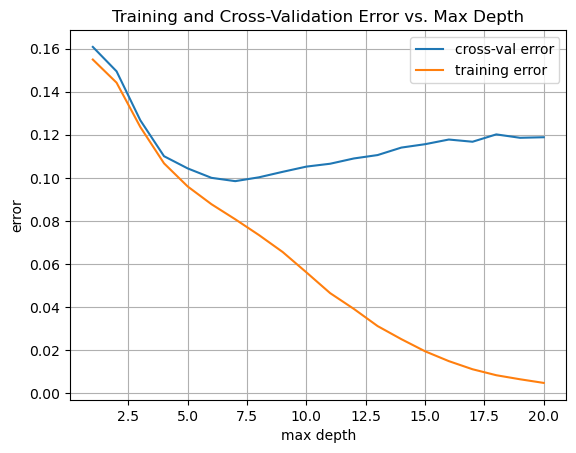

In [94]:
plt.plot(max_depth_array, cv_error, label='cross-val error')
plt.plot(max_depth_array, train_error, label='training error')

plt.legend(loc='best')
plt.xlabel('max depth')
plt.ylabel('error')
plt.title('Training and Cross-Validation Error vs. Max Depth')
plt.grid(True)

In [102]:
# select the value of max_depth which led to the best results
max_depth = 15 #= max_depth_array[np.argmin(cv_error)]
print("max_depth =", max_depth)
print("cross-val error = ", cv_error.min())

max_depth = 15
cross-val error =  0.0984573556436527


## Part 2: Improving our data

In [103]:
# we'll explore 20 training set sizes
# sample them evenly between 50 and the number of training samples
n_samples_array = np.linspace(50, Ntrain, 20).astype(int)
train_error_2 = np.zeros(n_samples_array.shape)
cv_error_2 = np.zeros(n_samples_array.shape)
     

In [104]:
#02-02.py
for i, n_samples in enumerate(n_samples_array):
    # print progress update
    print('%i / %i' % (n_samples, Ntrain))

    clf = DecisionTreeRegressor(max_depth=max_depth)
    clf.fit(X_train[:n_samples], y_train[:n_samples])

    y_train_pred = clf.predict(X_train[:n_samples])
    y_cv_pred = clf.predict(X_cv)

    train_error_2[i] = mean_absolute_error(y_train_pred,
                                       y_train[:n_samples])
    cv_error_2[i] = mean_absolute_error(y_cv_pred, y_cv)

50 / 3775
246 / 3775
442 / 3775
638 / 3775
834 / 3775
1030 / 3775
1226 / 3775
1422 / 3775
1618 / 3775
1814 / 3775
2010 / 3775
2206 / 3775
2402 / 3775
2598 / 3775
2794 / 3775
2990 / 3775
3186 / 3775
3382 / 3775
3578 / 3775
3775 / 3775


Text(0.5, 1.0, 'max_depth = 15')

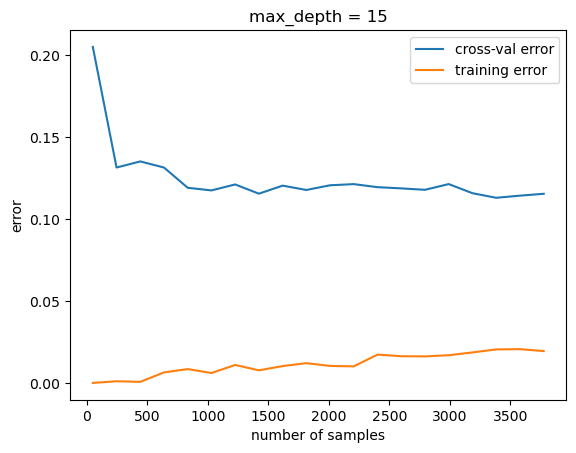

In [105]:
plt.plot(n_samples_array, cv_error_2, label='cross-val error')
plt.plot(n_samples_array, train_error_2, label='training error')

plt.legend(loc=0)
plt.xlabel('number of samples')
plt.ylabel('error')
plt.title('max_depth = %i' % max_depth)

In [108]:
# This is not the same formula as the one in the papers
def compute_outlier_fraction(y_pred, y_true, cutoff=0.2):
    return np.sum((abs(y_pred - y_true) > cutoff)) * 1. / len(y_pred)

1 / 20
2 / 20
3 / 20
4 / 20
5 / 20
6 / 20
7 / 20
8 / 20
9 / 20
10 / 20
11 / 20
12 / 20
13 / 20
14 / 20
15 / 20
16 / 20
17 / 20
18 / 20
19 / 20
20 / 20
max_depth = 7


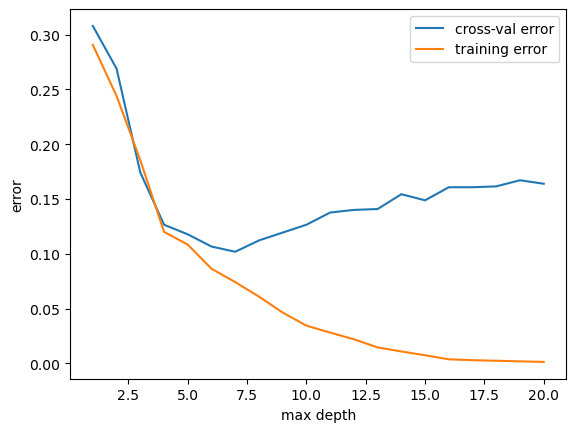

In [107]:
#02-03a.py

#------------------------------------------------------------
# first compute and plot the outlier fraction as a function
# of max_depth
max_depth_array = np.arange(1, 21)
train_error = np.zeros(len(max_depth_array))
cv_error = np.zeros(len(max_depth_array))

for i, max_depth in enumerate(max_depth_array):
    # print progress update
    print('%i / %i' % (max_depth, max_depth_array[-1]))

    clf = DecisionTreeRegressor(max_depth=max_depth)
    clf.fit(X_train, y_train)

    y_train_pred = clf.predict(X_train)
    y_cv_pred = clf.predict(X_cv)

    train_error[i] = compute_outlier_fraction(y_train_pred, y_train)
    cv_error[i] = compute_outlier_fraction(y_cv_pred, y_cv)

plt.figure()
plt.plot(max_depth_array, cv_error, label='cross-val error')
plt.plot(max_depth_array, train_error, label='training error')

plt.legend(loc=0)
plt.xlabel('max depth')
plt.ylabel('error')

# select the value of max_depth which led to the best results
max_depth = max_depth_array[np.argmin(cv_error)]
print("max_depth = %i" % max_depth)

50 / 3775
246 / 3775
442 / 3775
638 / 3775
834 / 3775
1030 / 3775
1226 / 3775
1422 / 3775
1618 / 3775
1814 / 3775
2010 / 3775
2206 / 3775
2402 / 3775
2598 / 3775
2794 / 3775
2990 / 3775
3186 / 3775
3382 / 3775
3578 / 3775
3775 / 3775


Text(0.5, 1.0, 'max_depth = 7')

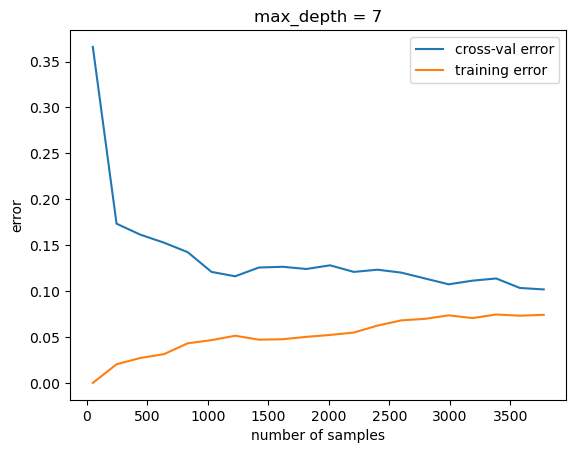

In [109]:
#02-03b.py

#------------------------------------------------------------
# compute and plot the outlier fraction
# as a function of number of samples
n_samples_array = np.linspace(50, Ntrain, 20).astype(int)
train_error_2 = np.zeros(n_samples_array.shape)
cv_error_2 = np.zeros(n_samples_array.shape)

for i, n_samples in enumerate(n_samples_array):
    # print progress update
    print('%i / %i' % (n_samples, Ntrain))

    clf = DecisionTreeRegressor(max_depth=max_depth)
    clf.fit(X_train[:n_samples], y_train[:n_samples])

    y_train_pred = clf.predict(X_train[:n_samples])
    y_cv_pred = clf.predict(X_cv)

    train_error_2[i] = compute_outlier_fraction(y_train_pred, y_train[:n_samples])
    cv_error_2[i] = compute_outlier_fraction(y_cv_pred, y_cv)
    
plt.figure()
plt.plot(n_samples_array, cv_error_2, label='cross-val error')
plt.plot(n_samples_array, train_error_2, label='training error')

plt.legend(loc=0)
plt.xlabel('number of samples')
plt.ylabel('error')

plt.title('max_depth = %i' % max_depth)